# **CLASSIFICATION WITH CNN: Fashion MNIST**

Fashion MNIST merupakan dataset berisi gambar baju dan aksesoris, seperti kemeja, tas, sepatu, dan barang mode lainnya. Fashion MNIST berisi 60.000 *training set* dan 10.000 *test set*. Serupa dengan MNIST, setiap data Fashion MNIST merupakan sebuah gambar skala abu (*grayscale*) berukuran 28x28 piksel. Masing-masing data memilki label asosiasinya yang terdiri dari 10 kelas.


In [1]:
#import package

import tensorflow as tf
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

# **Getting Data**

In [5]:
#download the data

from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

print('Fashion MNIST Dataset Shape:')
print('X_train: ',str(X_train.shape))
print('Y_train: ',str(Y_train.shape))
print('X_test:  ' ,str(X_test.shape))
print('Y_test:  ' ,str(Y_test.shape))

Fashion MNIST Dataset Shape:
X_train:  (60000, 28, 28)
Y_train:  (60000,)
X_test:   (10000, 28, 28)
Y_test:   (10000,)


In [8]:
# read data

sample = X_train[10].reshape(28,28)
print(sample)

[[  0   0   0   0   0   0   0  11 142 200 106   0   0   0   0   0   0   0
   85 185 112   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 152 214 217 194 236 216 187 149 135 153 211 217
  231 205 217 188  34   0   0   0   0   0]
 [  0   0   0   0   0  66 185 166 180 181 190 211 221 197 146 198 206 191
  168 190 172 188 175   0   0   0   0   0]
 [  0   0   0   0   0 135 153 160 175 180 170 186 187 190 188 190 187 174
  195 185 174 161 175  59   0   0   0   0]
 [  0   0   0   0   0 161 147 160 170 178 177 180 168 173 174 171 185 184
  185 172 171 164 174 120   0   0   0   0]
 [  0   0   0   0   2 175 146 145 168 178 181 185 180 184 178 179 187 191
  193 190 181 171 172 158   0   0   0   0]
 [  0   0   0   0  35 177 155 140 151 172 191 187 186 187 186 187 182 191
  194 188 180 161 161 185   0   0   0   0]
 [  0   0   0   0  59 170 153 141 120 154 160 161 172 168 166 161 165 172
  170 164 139 149 162 166  21   0   0   0]
 [  0   0   0   0  79 145 160 214 123 128 153 160 164 158 157 15

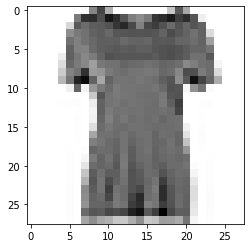

In [9]:
#visualize data

plt.imshow(sample, cmap='Greys')

#**Data Preparation for Modelling**

In [11]:
#We have defined train-test data automatically
#reshaping data

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [12]:
#normalizing data

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print('X_train shape', X_train.shape)
print('X_test shape', X_test.shape)


print('Banyak Gambar di X-train', X_train.shape[0])
print('Banyak Gambar di X-test', X_test.shape[0])

X_train shape (60000, 28, 28, 1)
X_test shape (10000, 28, 28, 1)
Banyak Gambar di X-train 60000
Banyak Gambar di X-test 10000


#**CNN Modelling (1-Conv)**

In [13]:
#built the model

model = Sequential()

#conv_1
model.add(Conv2D(32, kernel_size = (3,3), activation=tf.nn.relu, input_shape = input_shape))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

#input layer from flatten
model.add(Flatten())
model.add(Dense(250, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10, activation = tf.nn.softmax))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 250)               1352250   
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                        

In [14]:
#compiling and fitting the model

adam = Adam(lr=0.001)

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

CNN = model.fit(X_train, Y_train, epochs = 100, batch_size = 128)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


469/469 [==============================] - 40s 84ms/step - loss: 0.4935 - accuracy: 0.8257
Epoch 2/100
469/469 [==============================] - 42s 89ms/step - loss: 0.3306 - accuracy: 0.8826
Epoch 3/100
469/469 [==============================] - 39s 82ms/step - loss: 0.2912 - accuracy: 0.8945
Epoch 4/100
469/469 [==============================] - 38s 82ms/step - loss: 0.2672 - accuracy: 0.9023
Epoch 5/100
469/469 [==============================] - 38s 82ms/step - loss: 0.2511 - accuracy: 0.9085
Epoch 6/100
469/469 [==============================] - 39s 83ms/step - loss: 0.2354 - accuracy: 0.9136
Epoch 7/100
469/469 [==============================] - 37s 80ms/step - loss: 0.2199 - accuracy: 0.9184
Epoch 8/100
469/469 [==============================] - 38s 80ms/step - loss: 0.2093 - accuracy: 0.9222
Epoch 9/100
469/469 [==============================] - 47s 99ms/step - loss: 0.2001 - accuracy: 0.9262
Epoch 10/100
469/469 [==============================] - 38s 82ms/step - loss: 0.1908 

In [16]:
#model accuracy

CNN.history['accuracy'][-1]*100

98.38166832923889

In [17]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.4085 - accuracy: 0.9278


[0.4085400402545929, 0.9277999997138977]

#**Visualizing the Result (accuracy & loss)**

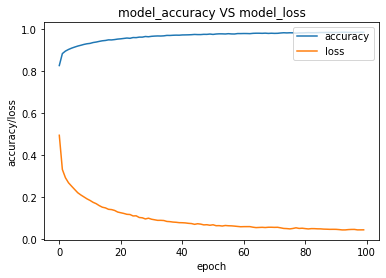

In [18]:
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['loss'])
plt.title('model_accuracy VS model_loss')
plt.ylabel('accuracy/loss')
plt.xlabel('epoch')
plt.legend(['accuracy','loss'], loc='upper right')
plt.savefig('acc_loss_plot_conv1.png')
plt.show()

#**Data Testing**

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

total_test = len(X_test)
correct_prediction = 0

Y_true = []
Y_pred = []

for i in range (len(X_test)):
  predict = model.predict(X_test[i].reshape(1,28,28,1))
  print(predict)
  
  label = Y_test[i]
  prediction = predict.argmax(axis=-1)
  print('Original label:',str(label))
  print('Original prediction:',str(prediction)+'\n')
  Y_true.append(label)
  Y_pred.append(prediction)
  
  if prediction[0] == label:
    correct_prediction +=1

Streaming output truncated to the last 5000 lines.
  1.0316298e-22 2.8216568e-13 2.8784243e-31 3.1481212e-21 4.9737383e-23]]
Original label: 4
Original prediction: [4]

[[3.1678513e-37 1.0000000e+00 0.0000000e+00 0.0000000e+00 1.7056672e-34
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]
Original label: 1
Original prediction: [1]

[[9.9862468e-01 3.6547510e-17 2.9493732e-09 1.7580464e-13 1.8685620e-14
  6.0309090e-17 1.3752922e-03 2.2280180e-18 2.3103419e-15 2.0779298e-18]]
Original label: 0
Original prediction: [0]

[[8.9208319e-10 2.7806651e-10 4.6826281e-07 1.5264062e-15 4.5770543e-10
  5.1930391e-12 4.9204998e-02 8.6951828e-11 9.5079452e-01 1.3165984e-10]]
Original label: 8
Original prediction: [8]

[[5.77333727e-14 1.07968292e-19 2.98323857e-06 6.51589649e-18
  9.99841452e-01 1.01009586e-16 1.55537520e-04 5.08934244e-24
  2.13234509e-16 1.71110697e-17]]
Original label: 4
Original prediction: [4]

[[2.6852181e-16 2.2198052e-17 1.6648054e-08 1.3375170e-27 1

In [20]:
#evaluation

print('total correct prediction =', str(correct_prediction)+"\n")
print('total incorrect prediction =', str(total_test - correct_prediction)+"\n")
print('accuracy =', accuracy_score(Y_true, Y_pred))
print('classification report: \n', classification_report(Y_true, Y_pred))

total correct prediction = 9278

total incorrect prediction = 722

accuracy = 0.9278
classification report: 
               precision    recall  f1-score   support

           0       0.87      0.90      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.90      0.88      0.89      1000
           3       0.93      0.92      0.93      1000
           4       0.88      0.90      0.89      1000
           5       0.99      0.98      0.99      1000
           6       0.81      0.78      0.80      1000
           7       0.96      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.96      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



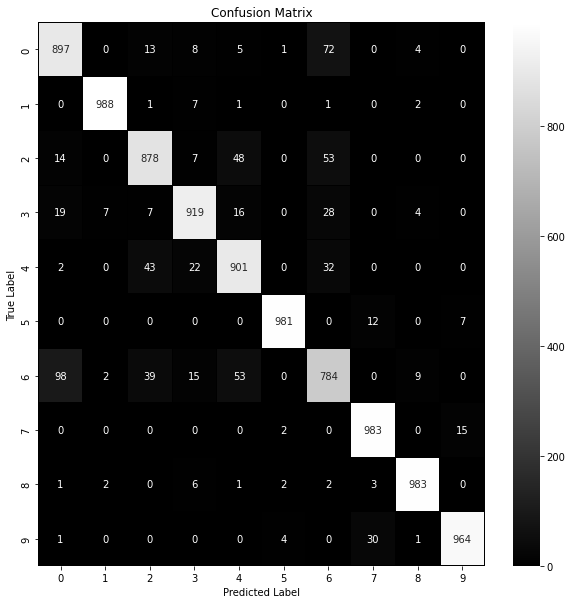

In [21]:
#confusion matrix

#y_pred_classes = np.argmax(y_pred, axis = 1)
confusionMatrix = confusion_matrix(Y_true, Y_pred)

import seaborn as sns

f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(confusionMatrix, annot=True, linewidths=0.1, cmap = 'gist_yarg_r', linecolor='black', fmt='.0f', ax=ax)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [22]:
#predicting
#For loop to print how many items of each class have been incorrectly estimated

for i in range(len(confusionMatrix)):
    print('Class:',str(i))
    print('Number of Wrong Prediction:', str(sum(confusionMatrix[i])-confusionMatrix[i][i]), 'Out of 1000')

Class: 0
Number of Wrong Prediction: 103 Out of 1000
Class: 1
Number of Wrong Prediction: 12 Out of 1000
Class: 2
Number of Wrong Prediction: 122 Out of 1000
Class: 3
Number of Wrong Prediction: 81 Out of 1000
Class: 4
Number of Wrong Prediction: 99 Out of 1000
Class: 5
Number of Wrong Prediction: 19 Out of 1000
Class: 6
Number of Wrong Prediction: 216 Out of 1000
Class: 7
Number of Wrong Prediction: 17 Out of 1000
Class: 8
Number of Wrong Prediction: 17 Out of 1000
Class: 9
Number of Wrong Prediction: 36 Out of 1000
